In [3]:
from draw_radar_image import (
    read_cwb_radar_sweep,
    RadarMapDisplayBasemap
)

import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename = 'data/gz/RCWF.20210722.1920.cref.00.gz'

# 讀取雷達資料
radar = read_cwb_radar_sweep(filename)

# 取得主要資料欄位名稱 (根據檔案名稱自動判斷)
field_name = list(radar.fields.keys())[0]

# 取得資料矩陣
data_matrix = radar.fields[field_name]['data']

# 極座標矩陣
data_matrix.shape

unzip files
header: (b'RCWFRCWFRCWFRCWF', 100, 76600, 2507, 12177, 202100, 700, 2200, 1900, 2000, 3800, 842, 21500, 100, 0, 36000, 46000, 0, 100, 212500, 100000, 1000, -9900, 0, 0, 0, 0, 0, 0, 1178948163, 0, 0, 0, 0, 5915236, 1113849856, 90)
rlat: 25.07
rlon: 121.77
data_shape: (360, 460)


(360, 460)

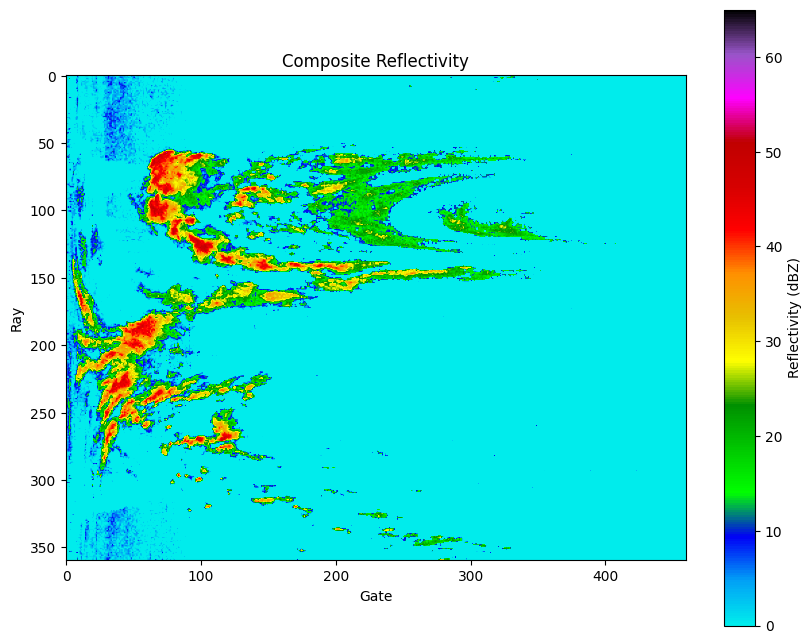

In [5]:
# 直接可是化矩陣(雷達迴波值，一個橫條是一個雷達波束)
plt.figure(figsize=(10, 8))
# 清除過小的雷達迴波值
plt.imshow(data_matrix,
           cmap='pyart_NWSRef', 
           vmin=0, vmax=65)

plt.colorbar(label='Reflectivity (dBZ)')
plt.title('Composite Reflectivity')
plt.xlabel('Gate')
plt.ylabel('Ray')
plt.show()

# 極座標轉換網格

In [6]:
from pyart.map import grid_from_radars

GRID_RANGE = 125000 # 單位為公尺

# 定義格網參數
grid_kwargs = {
    'grid_shape': (1, 512, 512),  # 只需要一層的z方向
    'grid_limits': ((0, 0),      # z方向範圍較小
                   (-GRID_RANGE, GRID_RANGE), # y方向範圍
                   (-GRID_RANGE, GRID_RANGE)), # x方向範圍
    'gridding_algo': 'map_gates_to_grid',  # 較快
    # gridding_algo='map_to_grid', # 較慢
}

# 讀取雷達資料 type: pyart.core.radar.Radar
radar = read_cwb_radar_sweep('data/gz/RCWF.20210722.1920.cref.00.gz')
# 將雷達資料轉換為格網資料(插值)
grid = grid_from_radars(radar, **grid_kwargs)  

unzip files
header: (b'RCWFRCWFRCWFRCWF', 100, 76600, 2507, 12177, 202100, 700, 2200, 1900, 2000, 3800, 842, 21500, 100, 0, 36000, 46000, 0, 100, 212500, 100000, 1000, -9900, 0, 0, 0, 0, 0, 0, 1178948163, 0, 0, 0, 0, 5915236, 1113849856, 90)
rlat: 25.07
rlon: 121.77
data_shape: (360, 460)


In [7]:
# 取得反射率資料
grid_data = grid.fields['composite_reflectivity']['data'][0]
# 上下顛倒
grid_data_reversed = np.flipud(grid_data)
print('Shape:', grid_data_reversed.shape)
print('Data:\n', grid_data_reversed)

Shape: (512, 512)
Data:
 [[-98.99999237060547 -98.9999771118164 -99.0 ... -99.0 -98.99998474121094
  -98.99999237060547]
 [-99.00000762939453 -98.99998474121094 -99.00001525878906 ...
  -98.99999237060547 -98.99999237060547 -99.0]
 [-98.99999237060547 -99.00000762939453 -99.00000762939453 ...
  -98.99998474121094 -98.99999237060547 -99.00000762939453]
 ...
 [-98.99999237060547 -98.99999237060547 -99.00000762939453 ...
  -95.9449234008789 -96.44437408447266 -97.01891326904297]
 [-98.99999237060547 -98.99999237060547 -99.00000762939453 ...
  -93.51901245117188 -94.43931579589844 -95.3918685913086]
 [-99.0000228881836 -98.99999237060547 -99.00000762939453 ...
  -89.89005279541016 -91.26341247558594 -93.02217864990234]]


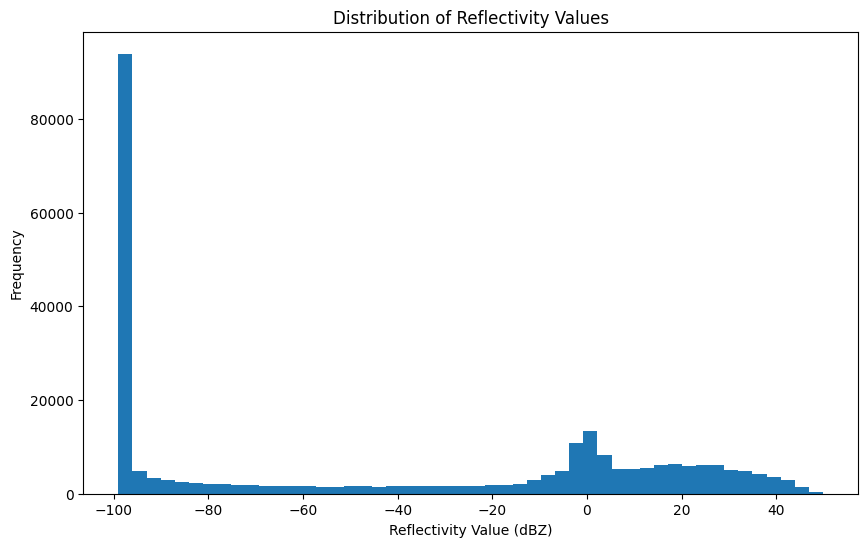

In [8]:
# 繪製網格資料的反射率分布
plt.figure(figsize=(10, 6))
plt.hist(grid_data_reversed.flatten(), bins=50)  # flatten() 將矩陣展平
plt.xlabel('Reflectivity Value (dBZ)')
plt.ylabel('Frequency')
plt.title('Distribution of Reflectivity Values')
plt.show()

## 網格資料可視化

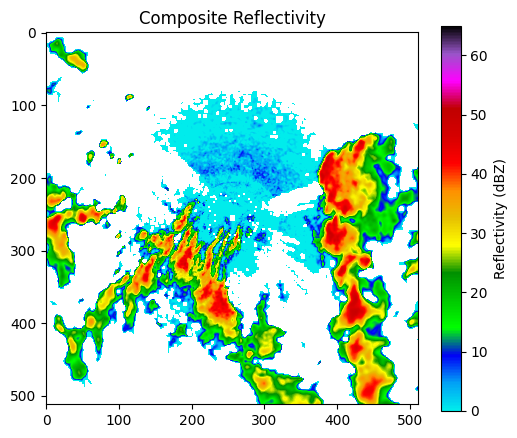

In [13]:
plt.figure(figsize=(6, 5))
# 清除過小的雷達迴波值
masked_data = np.ma.masked_where(grid_data_reversed <= -20, grid_data_reversed)
plt.imshow(masked_data,
           cmap='pyart_NWSRef', 
           vmin=0, vmax=65)

plt.colorbar(label='Reflectivity (dBZ)')
plt.title('Composite Reflectivity')
plt.show()

# 套件可視化
極座標直接可視化圖

In [10]:
# 五分山雷達站的經緯度
center_lat = 25.071182
center_lon = 121.781205

# 半徑 150 公里
radius_km = 150

# 計算經緯度範圍
lat_range = radius_km / 111  # 每緯度約為 111 公里
lon_range = radius_km / (111 * math.cos(math.radians(center_lat)))  # 每經度距離依緯度變化

# 設定雷達站的經緯度範圍
LAT_MIN = center_lat - lat_range
LAT_MAX = center_lat + lat_range
LON_MIN = center_lon - lon_range
LON_MAX = center_lon + lon_range

unzip files
header: (b'RCWFRCWFRCWFRCWF', 100, 76600, 2507, 12177, 202100, 700, 2200, 1900, 2000, 3800, 842, 21500, 100, 0, 36000, 46000, 0, 100, 212500, 100000, 1000, -9900, 0, 0, 0, 0, 0, 0, 1178948163, 0, 0, 0, 0, 5915236, 1113849856, 90)
rlat: 25.07
rlon: 121.77
data_shape: (360, 460)


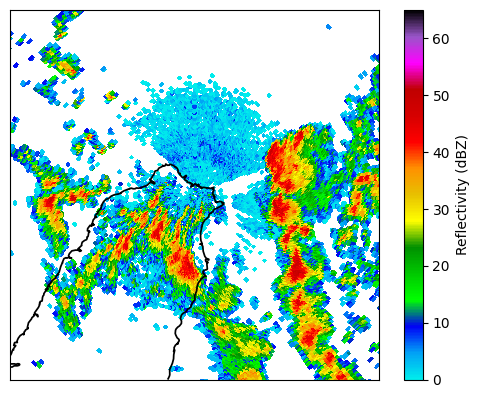

In [11]:
radar = read_cwb_radar_sweep(filename)
display = RadarMapDisplayBasemap(radar)

# 極座標直接繪製雷達圖
display.plot_ppi_map(
    list(radar.fields.keys())[0],
    sweep=0,
    resolution='h',
    vmin=0,
    vmax=65,
    cmap='pyart_NWSRef',
    embellish=True,
    min_lon=LON_MIN, max_lon=LON_MAX,
    min_lat=LAT_MIN, max_lat=LAT_MAX,
    mask_outside=True,
    projection='aeqd',
    colorbar_flag=True,
    colorbar_label='Reflectivity (dBZ)',
    title_flag=False
)

plt.show()